**Residential Load**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

Import csv data from https://data.sccer-jasm.ch/demand-hourly-profile-retrofits-cesar/jasm-demand-hourly-profile-retrofits-cesar-2020-09-17.zip
(https://www.sciencedirect.com/science/article/pii/S0378778819319486)

In [4]:
os.chdir('/home/MA')

In [5]:
load = pd.read_csv('Data/household_data_60min.csv')
load.head()

,Date/Time,Building_type,Construction_period,retrofit_scenario,Hot water + Space Heating demand [J](Hourly),Space Heating demand [J](Hourly),Hot water demand [J](Hourly),Space cooling demand [J](Hourly),Electricity demand [J](Hourly)
0,01/01 01:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
1,01/01 02:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
2,01/01 03:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
3,01/01 04:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
4,01/01 05:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41


In [6]:
load.Building_type.unique()

array(['MFH', 'SFH'], dtype=object)

In [7]:
load.Construction_period.unique()

array(['Before 1920', '1920-1945', '1946-1960', '1961-1970', '1971-1980',
       '1981-1985', '1986-1990', '1991-1995', '1996-2000', '2001-2005',
       '2006-2010', '2011-2015'], dtype=object)

In [8]:
load.retrofit_scenario.unique()

array(['Full retrofit', 'No retrofit'], dtype=object)

In [9]:
list(load.columns.values)

['Date/Time',
 'Building_type',
 'Construction_period',
 'retrofit_scenario',
 'Hot water + Space Heating demand [J](Hourly)',
 'Space Heating demand [J](Hourly)',
 'Hot water demand [J](Hourly)',
 'Space cooling demand [J](Hourly)',
 'Electricity demand [J](Hourly) ']

In [10]:
load['Date/Time'] = pd.to_datetime(load['Date/Time'], format=' %m/%d  %H:%M:%S')

In [11]:
len(load)

420480

In [12]:
load_MFH = load[load['Building_type']=='MFH']

In [13]:
len(load_MFH)

210240

In [14]:
load_MFH.head()

,Date/Time,Building_type,Construction_period,retrofit_scenario,Hot water + Space Heating demand [J](Hourly),Space Heating demand [J](Hourly),Hot water demand [J](Hourly),Space cooling demand [J](Hourly),Electricity demand [J](Hourly)
0,1900-01-01 01:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
1,1900-01-01 02:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
2,1900-01-01 03:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
3,1900-01-01 04:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41
4,1900-01-01 05:00:00,MFH,Before 1920,Full retrofit,0.0,0.0,0.0,0.0,3388381.41


In [15]:
load_MFH=load_MFH.groupby([load_MFH['Date/Time'].dt.month, load_MFH['Date/Time'].dt.day, load_MFH['Date/Time'].dt.hour]).mean()

In [16]:
load_MFH.head()

Hot water + Space Heating demand [J](Hourly)  \
Date/Time Date/Time Date/Time                                                 
1         1         0                                          2.480854e+07   
                    1                                          2.475063e+07   
                    2                                          2.515728e+07   
                    3                                          2.746403e+07   
                    4                                          2.995830e+07   

                               Space Heating demand [J](Hourly)  \
Date/Time Date/Time Date/Time                                     
1         1         0                              2.480854e+07   
                    1                              2.475063e+07   
                    2                              2.515728e+07   
                    3                              2.746403e+07   
                    4                              2.995830e+07   

                               Hot water demand [J](Hourly)  \
Date/Time Date/Time Date/Time                                 
1         1         0                                   0.0   
                    1                                   0.0   
                    2                                   0.0   
                    3                                   0.0   
                    4                                   0.0   

                               Space cooling demand [J](Hourly)  \
Date/Time Date/Time Date/Time                                     
1         1         0                                       0.0   
                    1                                       0.0   
                    2                                       0.0   
                    3                                       0.0   
                    4                                       0.0   

                               Electricity demand [J](Hourly)   
Date/Time Date/Time Date/Time                                   
1         1         0                             6.296531e+06  
                    1                             6.296531e+06  
                    2                             6.296531e+06  
                    3                             6.296531e+06  
                    4                             6.296531e+06

In [17]:
load_MFH.index.names = ["month", "day", "hour"]

In [18]:
len(load_MFH)

8760

Convert to kWh

In [19]:
load_MFH['Electricity demand [kWh](Hourly) '] = load_MFH['Electricity demand [J](Hourly) ']/3600000 

In [20]:
load_MFH.tail(10)

Hot water + Space Heating demand [J](Hourly)  \
month day hour                                                 
12    31  14                                    1.612145e+08   
          15                                    4.864069e+07   
          16                                    6.102981e+07   
          17                                    6.673619e+07   
          18                                    1.911300e+08   
          19                                    1.844752e+08   
          20                                    1.631320e+08   
          21                                    1.737155e+08   
          22                                    1.857263e+08   
          23                                    5.075674e+07   

                Space Heating demand [J](Hourly)  \
month day hour                                     
12    31  14                        1.521789e+08   
          15                        4.864069e+07   
          16                        6.102981e+07   
          17                        6.673619e+07   
          18                        1.820945e+08   
          19                        1.664042e+08   
          20                        1.450609e+08   
          21                        1.556445e+08   
          22                        1.631375e+08   
          23                        5.075674e+07   

                Hot water demand [J](Hourly)  \
month day hour                                 
12    31  14                    9.035523e+06   
          15                    0.000000e+00   
          16                    0.000000e+00   
          17                    0.000000e+00   
          18                    9.035523e+06   
          19                    1.807105e+07   
          20                    1.807105e+07   
          21                    1.807105e+07   
          22                    2.258881e+07   
          23                    0.000000e+00   

                Space cooling demand [J](Hourly)  \
month day hour                                     
12    31  14                                 0.0   
          15                                 0.0   
          16                                 0.0   
          17                                 0.0   
          18                                 0.0   
          19                                 0.0   
          20                                 0.0   
          21                                 0.0   
          22                                 0.0   
          23                                 0.0   

                Electricity demand [J](Hourly)   \
month day hour                                    
12    31  14                       3.226001e+07   
          15                       1.121979e+07   
          16                       1.121979e+07   
          17                       1.121979e+07   
          18                       3.226001e+07   
          19                       6.248336e+07   
          20                       6.763456e+07   
          21                       2.733676e+07   
          22                       2.733676e+07   
          23                       1.007445e+07   

                Electricity demand [kWh](Hourly)   
month day hour                                     
12    31  14                             8.961115  
          15                             3.116607  
          16                             3.116607  
          17                             3.116607  
          18                             8.961115  
          19                            17.356490  
          20                            18.787378  
          21                             7.593544  
          22                             7.593544  
          23                             2.798458

Plot first daily profile

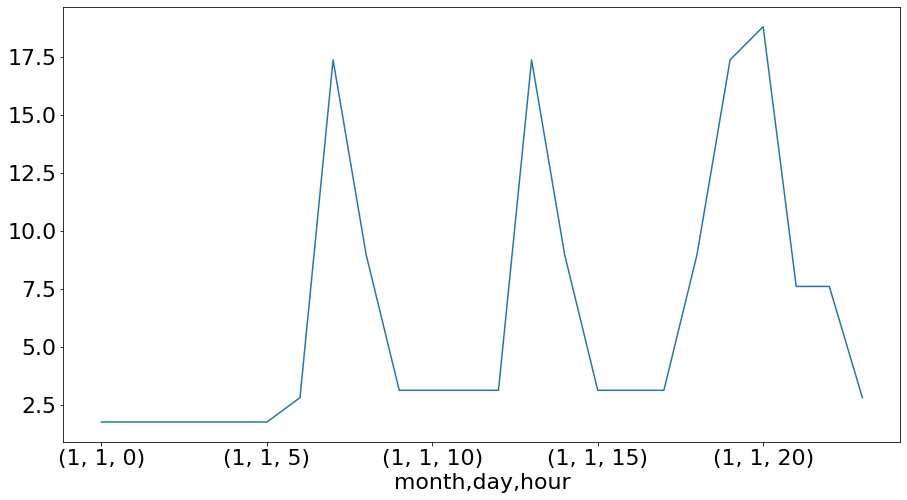

In [21]:
load_MFH['Electricity demand [kWh](Hourly) '].head(24).plot();

Plot monthly profile in January

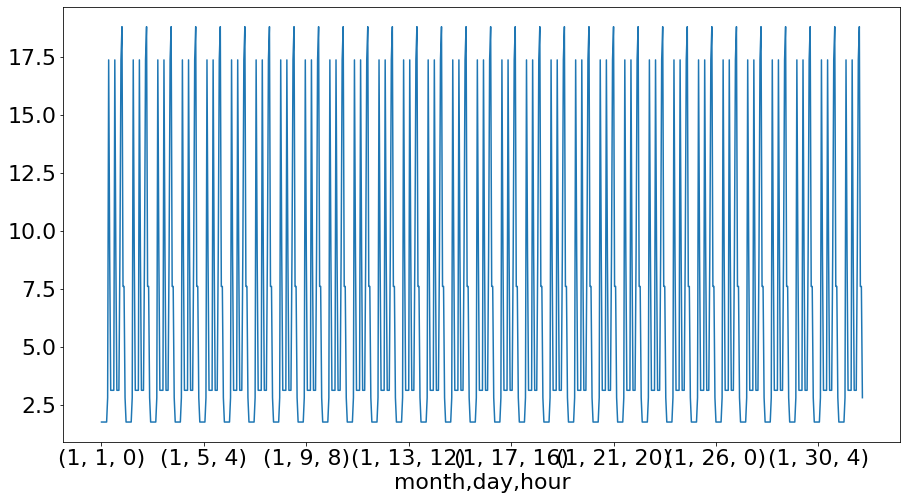

In [22]:
load_MFH['Electricity demand [kWh](Hourly) '].head(744).plot();

Compare this to another month's value to see whether electricity consumption changes seasonally.

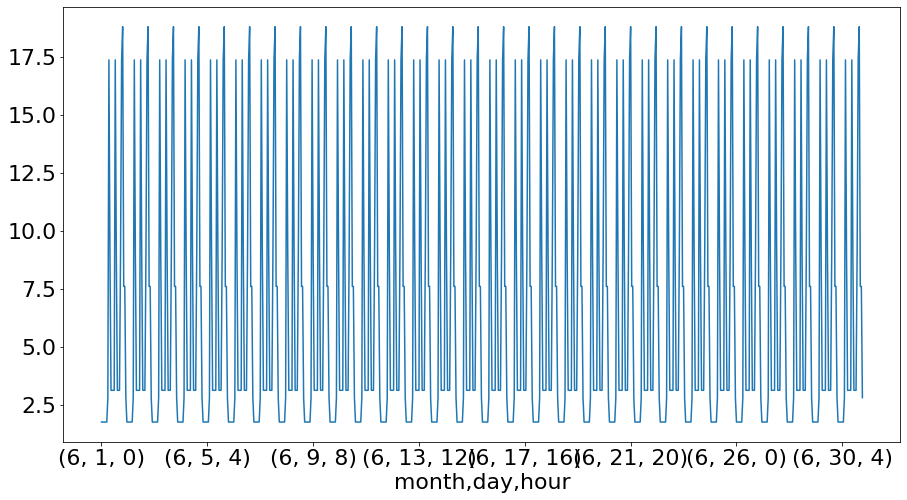

In [23]:
load_MFH['Electricity demand [kWh](Hourly) '].iloc[load_MFH.index.get_level_values('month') == 6].plot();

It does not, hence heating demand supposedly is decoupled from electricity demand, only appliances are considered. We need to find a metric to include electricity demand by heating (heat pumps consumption, direct electrical heating).

Same procedure for single family homes

In [24]:
load_SFH = load[load['Building_type']=='SFH']

In [25]:
len(load_SFH)

210240

In [26]:
load_SFH = load_SFH.groupby([load_SFH['Date/Time'].dt.month, load_SFH['Date/Time'].dt.day, load_SFH['Date/Time'].dt.hour]).mean()

In [27]:
load_SFH.index.names = ["month", "day", "hour"]

In [28]:
len(load_SFH)

8760

In [29]:
load_SFH['Electricity demand [kWh](Hourly) '] = load_SFH['Electricity demand [J](Hourly) ']/3600000 

In [30]:
load_SFH.tail(10)

Hot water + Space Heating demand [J](Hourly)  \
month day hour                                                 
12    31  14                                    3.564393e+07   
          15                                    1.124605e+07   
          16                                    1.419000e+07   
          17                                    1.532049e+07   
          18                                    4.177409e+07   
          19                                    3.880809e+07   
          20                                    3.699793e+07   
          21                                    3.845037e+07   
          22                                    3.949571e+07   
          23                                    1.224196e+07   

                Space Heating demand [J](Hourly)  \
month day hour                                     
12    31  14                        3.454189e+07   
          15                        1.124605e+07   
          16                        1.419000e+07   
          17                        1.532049e+07   
          18                        4.067205e+07   
          19                        3.660400e+07   
          20                        3.479385e+07   
          21                        3.624629e+07   
          22                        3.674061e+07   
          23                        1.224196e+07   

                Hot water demand [J](Hourly)  \
month day hour                                 
12    31  14                    1.102042e+06   
          15                    0.000000e+00   
          16                    0.000000e+00   
          17                    0.000000e+00   
          18                    1.102042e+06   
          19                    2.204083e+06   
          20                    2.204083e+06   
          21                    2.204083e+06   
          22                    2.755104e+06   
          23                    0.000000e+00   

                Space cooling demand [J](Hourly)  \
month day hour                                     
12    31  14                                 0.0   
          15                                 0.0   
          16                                 0.0   
          17                                 0.0   
          18                                 0.0   
          19                                 0.0   
          20                                 0.0   
          21                                 0.0   
          22                                 0.0   
          23                                 0.0   

                Electricity demand [J](Hourly)   \
month day hour                                    
12    31  14                       4.862383e+06   
          15                       1.119961e+06   
          16                       1.119961e+06   
          17                       1.119961e+06   
          18                       4.862383e+06   
          19                       1.023820e+07   
          20                       1.203013e+07   
          21                       4.862383e+06   
          22                       4.862383e+06   
          23                       1.791938e+06   

                Electricity demand [kWh](Hourly)   
month day hour                                     
12    31  14                             1.350662  
          15                             0.311100  
          16                             0.311100  
          17                             0.311100  
          18                             1.350662  
          19                             2.843943  
          20                             3.341704  
          21                             1.350662  
          22                             1.350662  
          23                             0.497760

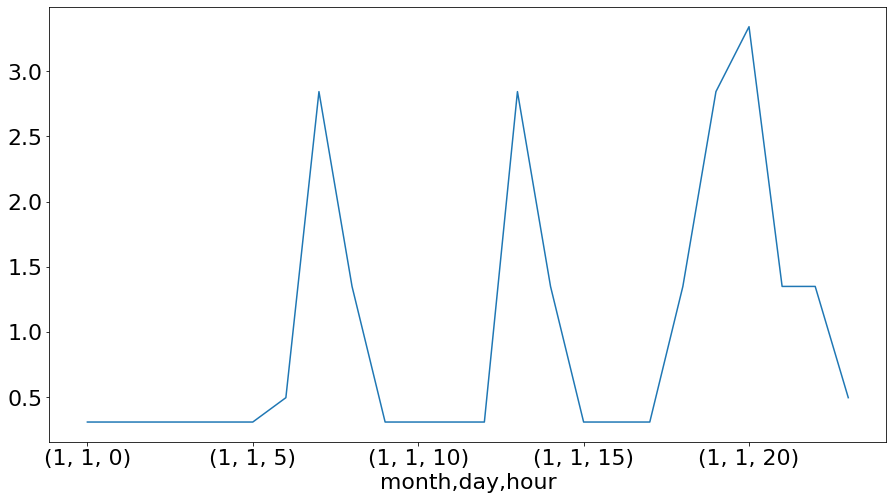

In [31]:
load_SFH['Electricity demand [kWh](Hourly) '].head(24).plot();

In [32]:
sum(load_SFH['Electricity demand [kWh](Hourly) '].head(24))

23.666668014303234

In [33]:
load_MFH['Electricity demand [kWh](Hourly) '].mean()

6.284777708197722

In [34]:
load_SFH['Electricity demand [kWh](Hourly) '].mean()

0.9861111672626348

In [35]:
load_MFH['Electricity demand [kWh](Hourly) '].mean()/load_SFH['Electricity demand [kWh](Hourly) '].mean()

6.37329534117716

In [36]:
elec_load = load[['Date/Time', 'Building_type', 'Construction_period', 'retrofit_scenario', 'Electricity demand [J](Hourly) ']]
elec_load.head()

,Date/Time,Building_type,Construction_period,retrofit_scenario,Electricity demand [J](Hourly)
0,1900-01-01 01:00:00,MFH,Before 1920,Full retrofit,3388381.41
1,1900-01-01 02:00:00,MFH,Before 1920,Full retrofit,3388381.41
2,1900-01-01 03:00:00,MFH,Before 1920,Full retrofit,3388381.41
3,1900-01-01 04:00:00,MFH,Before 1920,Full retrofit,3388381.41
4,1900-01-01 05:00:00,MFH,Before 1920,Full retrofit,3388381.41


Daily profile is identical, absolute consumption differs by a factor of 6.37, on average.
According to https://de.statista.com/statistik/daten/studie/435213/umfrage/ein-und-mehrfamilienhaeuser-in-der-schweiz/,
there were about 1 million SFH and 476,000 MFH in Switzerland (2019).
Therefore, a weighted average is introduced.

In [37]:
average_elec_load = (load_SFH*1000700+load_MFH*475801)/(1000700+475801)

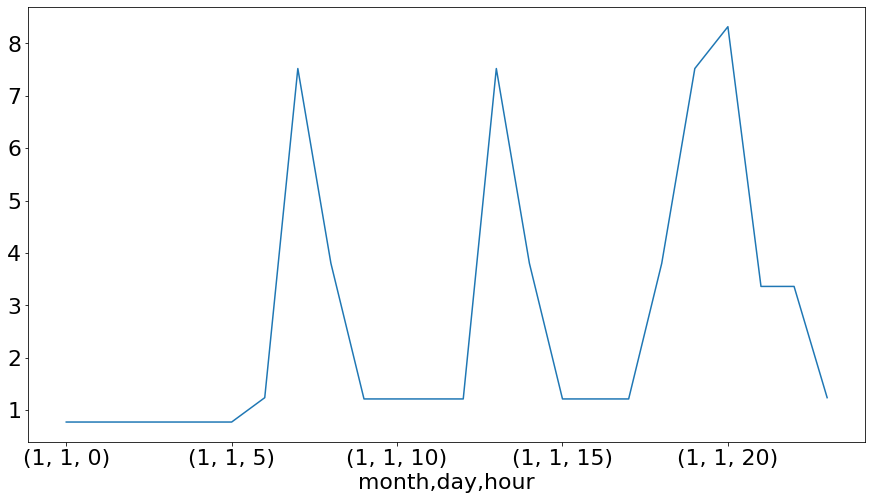

In [38]:
average_elec_load['Electricity demand [kWh](Hourly) '].head(24).plot();

In [39]:
sum(average_elec_load['Electricity demand [kWh](Hourly) '])/365

64.64643039322827

In [40]:
hvac_load_SFH = load_SFH.drop(['Electricity demand [J](Hourly) ', 'Electricity demand [kWh](Hourly) '], 1)

In [41]:
hvac_load_SFH.head()

Hot water + Space Heating demand [J](Hourly)  \
month day hour                                                 
1     1   0                                     5.268264e+06   
          1                                     5.347235e+06   
          2                                     5.442333e+06   
          3                                     5.807174e+06   
          4                                     6.181561e+06   

                Space Heating demand [J](Hourly)  \
month day hour                                     
1     1   0                         5.268264e+06   
          1                         5.347235e+06   
          2                         5.442333e+06   
          3                         5.807174e+06   
          4                         6.181561e+06   

                Hot water demand [J](Hourly)  Space cooling demand [J](Hourly)  
month day hour                                                                  
1     1   0                              0.0                               0.0  
          1                              0.0                               0.0  
          2                              0.0                               0.0  
          3                              0.0                               0.0  
          4                              0.0                               0.0

*Assumptions:*      
Hot water boiler efficiency: 100%  
Space heating by heat pump COP: 3.1 https://www.pickhvac.com/faq/heat-pump-cop/  
Average EER of air conditioning: 8.5 https://learnmetrics.com/eer-rating/#:~:text=The%20average%20EER%20rating%20of%20portable%20AC%20units%20is%20about%208.5.

In [42]:
HW_boiler_eff = 1
HP_COP = 3.1
AC_EER = 8.5

In [43]:
list(hvac_load_SFH.columns.values)

['Hot water + Space Heating demand [J](Hourly)',
 'Space Heating demand [J](Hourly)',
 'Hot water demand [J](Hourly)',
 'Space cooling demand [J](Hourly)']

In [44]:
hvac_elec_load_SFH = pd.DataFrame()

In [45]:
hvac_elec_load_SFH['Electricity for Space Heating [kWh]'] = hvac_load_SFH['Space Heating demand [J](Hourly)']/HP_COP/3600000

In [46]:
hvac_elec_load_SFH['Electricity for Hot Water [kWh]'] = hvac_load_SFH['Hot water demand [J](Hourly)']/HW_boiler_eff/3600000

In [47]:
hvac_elec_load_SFH['Electricity for Space Cooling [kWh]'] = hvac_load_SFH['Space cooling demand [J](Hourly)']/AC_EER/3600000

In [48]:
hvac_elec_load_SFH.head()

Electricity for Space Heating [kWh]  \
month day hour                                        
1     1   0                                0.472067   
          1                                0.479143   
          2                                0.487664   
          3                                0.520356   
          4                                0.553903   

                Electricity for Hot Water [kWh]  \
month day hour                                    
1     1   0                                 0.0   
          1                                 0.0   
          2                                 0.0   
          3                                 0.0   
          4                                 0.0   

                Electricity for Space Cooling [kWh]  
month day hour                                       
1     1   0                                     0.0  
          1                                     0.0  
          2                                     0.0  
          3                                     0.0  
          4                                     0.0

In [49]:
list(hvac_elec_load_SFH.columns.values)

['Electricity for Space Heating [kWh]',
 'Electricity for Hot Water [kWh]',
 'Electricity for Space Cooling [kWh]']

Rearrange columns for plot representation

In [63]:
hvac_elec_load_SFH = hvac_elec_load_SFH[['Electricity for Hot Water [kWh]', 'Electricity for Space Cooling [kWh]', 'Electricity for Space Heating [kWh]']]

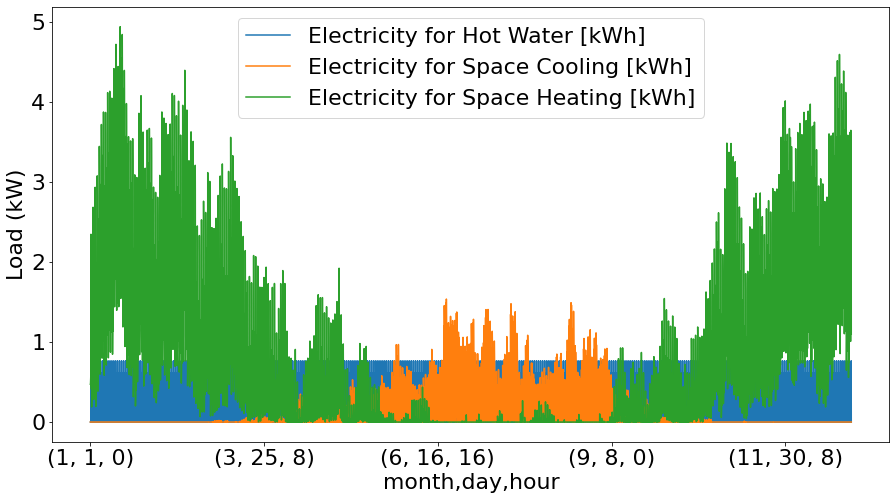

In [64]:
hvac_elec_load_SFH.plot(ylabel = 'Load (kW)');

In [52]:
hvac_elec_load_SFH['Total electricity [kWh]'] = hvac_elec_load_SFH['Electricity for Space Heating [kWh]'] + hvac_elec_load_SFH['Electricity for Hot Water [kWh]'] + hvac_elec_load_SFH['Electricity for Space Cooling [kWh]']

In [53]:
sum(hvac_elec_load_SFH['Electricity for Space Heating [kWh]'])

5983.939731525762

In [54]:
sum(hvac_elec_load_SFH['Electricity for Hot Water [kWh]'])

1675.5625827246624

In [55]:
sum(hvac_elec_load_SFH['Electricity for Space Cooling [kWh]'])

754.9980822889078

Calculate total of electric appliances and hvac load

In [56]:
total_elec_load = load_SFH['Electricity demand [kWh](Hourly) '] + hvac_elec_load_SFH['Total electricity [kWh]']

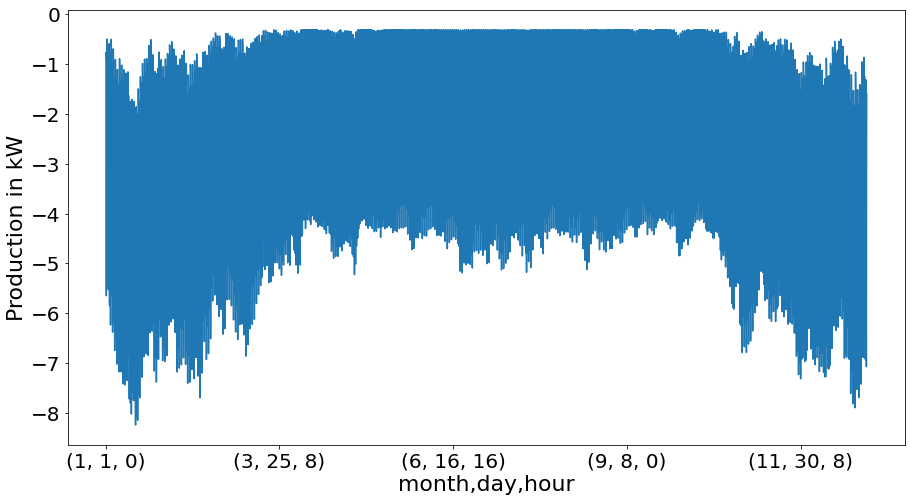

In [57]:
total_elec_load_inverted = -total_elec_load #invert
total_elec_load_inverted.plot(fontsize = 20, ylabel = 'Production in kW');

In [58]:
sum(total_elec_load)

17052.834221759887

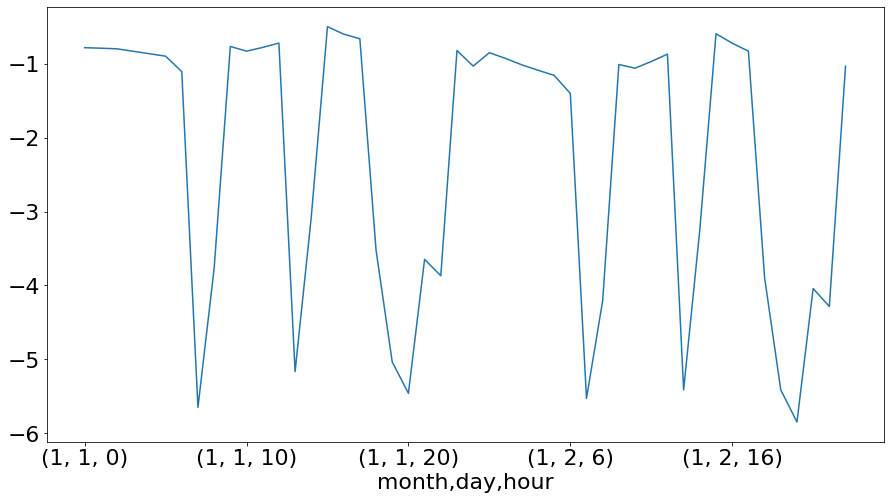

In [59]:
total_elec_load_inverted.head(48).plot();

In [60]:
total_elec_load.to_pickle('load_CH.pkl')